# Plot generation to compare different models

In [1]:
segmentation_results_csv = './final_results_segmentation.csv'

import os

plot_dir = './plots/'

# make sure the directory exists
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

## Segmentation Results

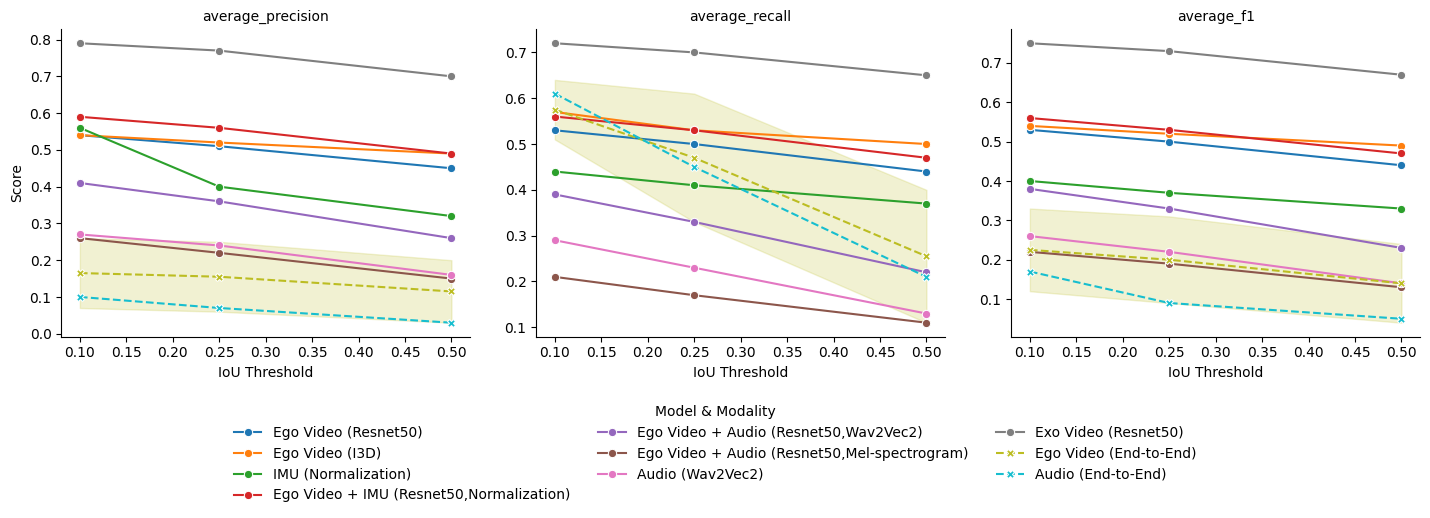

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data from CSV (replace 'your_file.csv' with the path to your CSV file)
df = pd.read_csv(segmentation_results_csv)

# Melt DataFrame for plotting
df_melted = df.melt(
    id_vars=['model', 'modality'],  # Include 'model' here to differentiate line styles
    value_vars=[
        'average_precision@0.1', 'average_precision@0.25', 'average_precision@0.5',
        'average_recall@0.1', 'average_recall@0.25', 'average_recall@0.5',
        'average_f1@0.1', 'average_f1@0.25', 'average_f1@0.5'
    ],
    var_name='Metric_Threshold',
    value_name='Score'
)

# Split 'Metric_Threshold' into 'Metric' and 'IoU Threshold' columns
df_melted[['Metric', 'IoU Threshold']] = df_melted['Metric_Threshold'].str.split('@', expand=True)
df_melted['IoU Threshold'] = df_melted['IoU Threshold'].astype(float)  # Convert threshold to float

# Set up the FacetGrid for three metrics, with dashed lines for different models
g = sns.FacetGrid(df_melted, col='Metric', hue='modality', sharey=False, height=4, aspect=1.2, legend_out=False)

# Define a custom function to map the line style based on the model
def lineplot_with_style(data, **kwargs):
    line_style = '-' if data['model'].iloc[0] == 'MTRSAP' else '--'  # Change condition as needed for different models
    marker_style = 'o' if data['model'].iloc[0] == 'MTRSAP' else 'X'  # Change condition as needed for different models
    sns.lineplot(data=data, x='IoU Threshold', y='Score', marker=marker_style, linestyle=line_style, **kwargs)

# Apply the custom line plotting function
g.map_dataframe(lineplot_with_style)

# Remove the automatic legend
g.add_legend = lambda *args, **kwargs: None

# Create a single legend manually
handles, labels = g.axes.flat[0].get_legend_handles_labels()
plt.figlegend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, title='Model & Modality', frameon=False)

# Set labels and titles
g.set_axis_labels('IoU Threshold', 'Score')
g.set_titles("{col_name}")

# Show and save the plot
plt.show()
g.savefig(f'{plot_dir}/segmentation_results.png', bbox_inches='tight')


Skipping Exo Video (Resnet50) for now
Skipping Exo Video (Resnet50) for now
Skipping Exo Video (Resnet50) for now


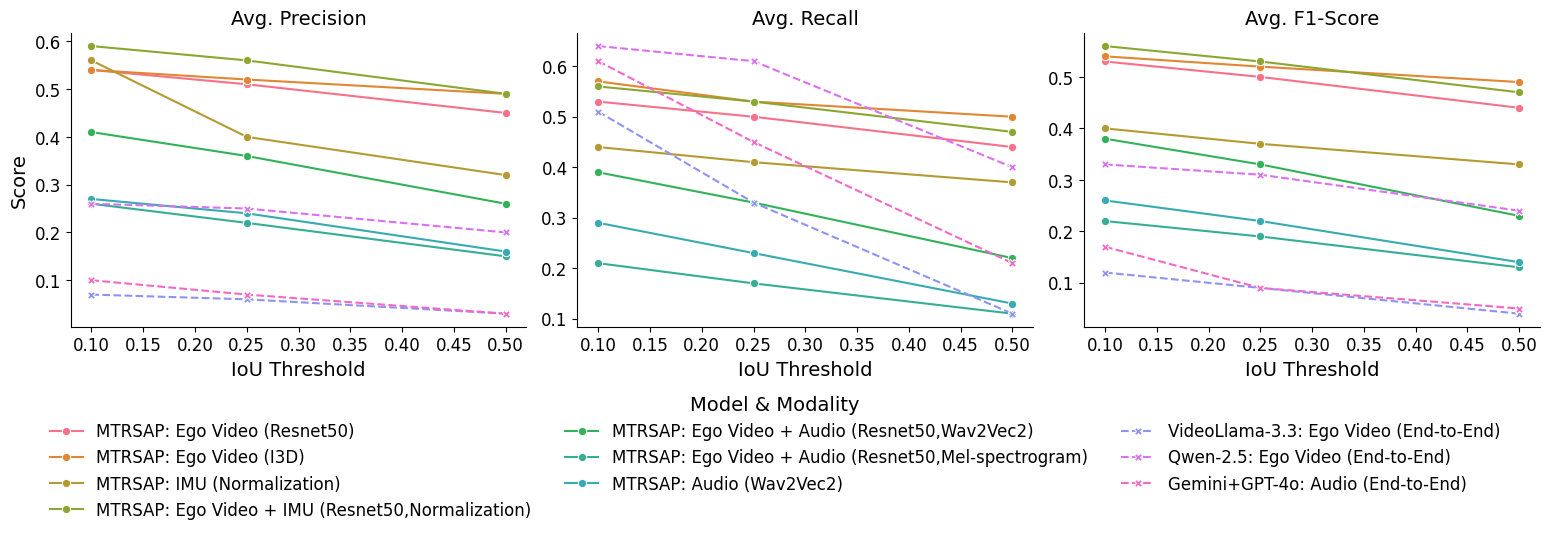

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data
df = pd.read_csv(segmentation_results_csv)  # Update path as needed

# Melt DataFrame
df_melted = df.melt(
    id_vars=['model', 'modality'],
    value_vars=[
        'average_precision@0.1', 'average_precision@0.25', 'average_precision@0.5',
        'average_recall@0.1', 'average_recall@0.25', 'average_recall@0.5',
        'average_f1@0.1', 'average_f1@0.25', 'average_f1@0.5'
    ],
    var_name='Metric_Threshold',
    value_name='Score'
)

# Split Metric & Threshold
df_melted[['Metric', 'IoU Threshold']] = df_melted['Metric_Threshold'].str.split('@', expand=True)
df_melted['IoU Threshold'] = df_melted['IoU Threshold'].astype(float)

# Create combined column for legend
df_melted['model_modality'] = df_melted['model'] + ': ' + df_melted['modality']

# Reset seaborn style
sns.reset_orig()

# Setup FacetGrid
g = sns.FacetGrid(
    df_melted,
    col='Metric',
    hue='model_modality',
    sharey=False,
    height=4,
    aspect=1.3,
    legend_out=True
)

# Plot function with special styling
def lineplot_with_style(data, **kwargs):
    color = kwargs.pop('color', None)
    label = kwargs.pop('label', None)
    model = data['model'].iloc[0]
    modality = data['modality'].iloc[0]
    
    # Default styles
    ls = '-' if model == 'MTRSAP' else '--'
    marker = 'o' if model == 'MTRSAP' else 'X'
    
    # Special style for Exo Video (Resnet50)
    if modality == 'Exo Video (Resnet50)':  # Adjust exact label
        ls = '-.'
        marker = 'D'
        color = 'gray'  # override to distinct black
        label = "Exo Video (Resnet50)**"

        # skip the exo for now
        print("Skipping Exo Video (Resnet50) for now")
        return
        
    sns.lineplot(
        x='IoU Threshold', y='Score', data=data,
        linestyle=ls, marker=marker, color=color,
        label=label, **kwargs
    )

# Map plotting function
g.map_dataframe(lineplot_with_style)

# Pretty titles for metrics
metric_title_map = {
    'average_precision': 'Avg. Precision',
    'average_recall': 'Avg. Recall',
    'average_f1': 'Avg. F1-Score'
}
g.set_titles(col_template="{col_name}")
for ax in g.axes.flat:
    metric_key = ax.get_title().replace("Metric = ", "")
    ax.set_title(metric_title_map.get(metric_key, metric_key), fontsize=14)
    ax.tick_params(labelsize=12)

# Manual legend
handles, labels = g.axes.flat[0].get_legend_handles_labels()
g.fig.legend(
    handles, labels,
    loc='lower center', bbox_to_anchor=(0.5, -0.35),
    ncol=3, frameon=False, fontsize=12, title='Model & Modality', title_fontsize=14
)

# Axis labels
g.set_axis_labels('IoU Threshold', 'Score', fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 1])  # Leaves top space for legend
plt.show()
g.savefig(f'./plots/segmentation_results_aaai26.png', dpi=300, bbox_inches='tight')


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Load data
# df = pd.read_csv(segmentation_results_csv)

# # Melt and process
# df_melted = df.melt(
#     id_vars=['model', 'modality'],
#     value_vars=[
#         'average_precision@0.1', 'average_precision@0.25', 'average_precision@0.5',
#         'average_recall@0.1', 'average_recall@0.25', 'average_recall@0.5',
#         'average_f1@0.1', 'average_f1@0.25', 'average_f1@0.5'
#     ],
#     var_name='Metric_Threshold',
#     value_name='Score'
# )
# df_melted[['Metric', 'IoU Threshold']] = df_melted['Metric_Threshold'].str.split('@', expand=True)
# df_melted['IoU Threshold'] = df_melted['IoU Threshold'].astype(float)
# df_melted['model_modality'] = df_melted['model'] + ': ' + df_melted['modality']

# # Set color palette and style
# sns.set(style='whitegrid')
# palette = sns.color_palette("tab10", n_colors=df_melted['model_modality'].nunique())

# # Plot
# g = sns.FacetGrid(
#     df_melted,
#     col='Metric',
#     hue='model_modality',
#     sharey=False,
#     height=3.5,
#     aspect=1.3,
#     palette=palette,
#     legend_out=False
# )

# def lineplot_with_style(data, **kwargs):
#     model = data['model'].iloc[0]
#     style = '-' if model == 'MTRSAP' else '--'
#     marker = 'o' if model == 'MTRSAP' else 'X'
#     sns.lineplot(
#         data=data,
#         x='IoU Threshold',
#         y='Score',
#         marker=marker,
#         linestyle=style,
#         linewidth=2,
#         markersize=6,
#         **kwargs
#     )

# g.map_dataframe(lineplot_with_style)

# # Axis and title formatting
# metric_title_map = {
#     'average_precision': 'Avg. Precision',
#     'average_recall': 'Avg. Recall',
#     'average_f1': 'Avg. F1-Score'
# }
# g.set_titles(col_template="{col_name}")
# for ax in g.axes.flat:
#     title = ax.get_title().replace("Metric = ", "").strip()
#     ax.set_title(metric_title_map.get(title, title), fontsize=13)
#     ax.tick_params(labelsize=11)

# g.set_axis_labels("IoU Threshold", "Score", fontsize=13)

# # Adjust legend
# handles, labels = g.axes.flat[0].get_legend_handles_labels()
# g.fig.legend(
#     handles,
#     labels,
#     loc='lower center',
#     bbox_to_anchor=(0.5, -0.22),
#     ncol=3,
#     frameon=False,
#     fontsize=11,
#     title='Model & Modality',
#     title_fontsize=12
# )

# # Tight layout for AAAI
# plt.tight_layout(rect=[0, 0.05, 1, 1])  # leave space at bottom for legend

# # Save figure
# # output_path = f"{plot_dir}/segmentation_results_aaai26.png"
# g.savefig(output_path, dpi=300, bbox_inches='tight')
# plt.show()


# Classification Results

Skipping Exo Video (Resnet50) for now


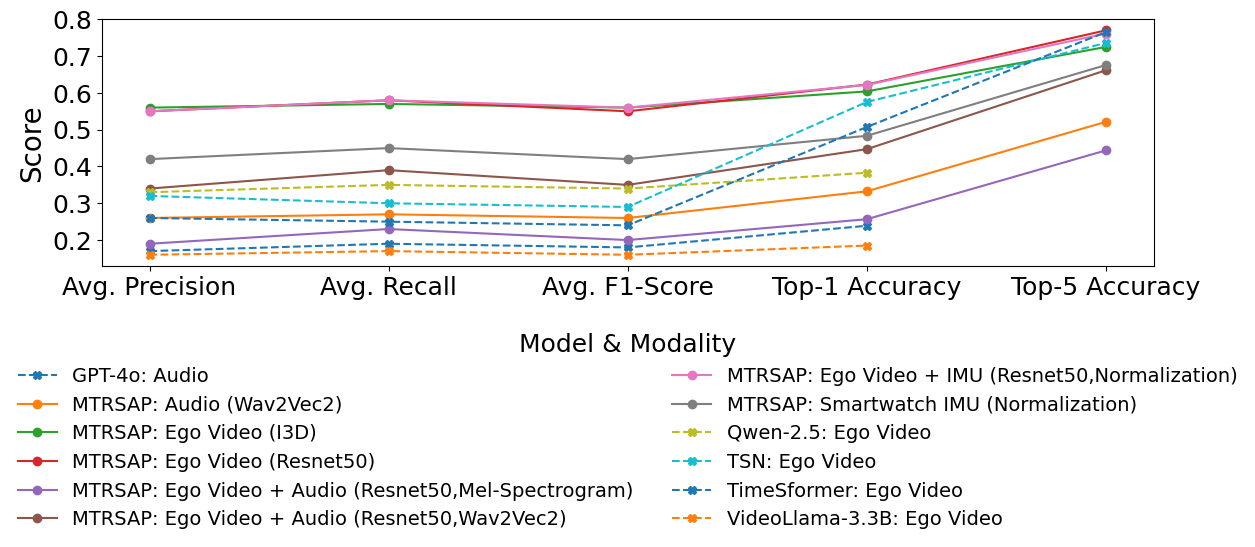

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Font and figure size variables
axis_label_fontsize = 20
tick_fontsize = 18
legend_fontsize = 14
legend_title_fontsize = 18
fig_width, fig_height = 9, 6

# Load classification results
df = pd.read_csv("./final_results_classification.csv")

sns.reset_orig()

# Normalize accuracy if it's in percentage
if df["accuracy"].max() > 1.0:
    df["accuracy"] /= 100.0

if df["top_5_accuracy"].max() > 1.0:
    df["top_5_accuracy"] /= 100.0

# Create combined legend label
df["model_modality"] = df["model"] + ": " + df["modality"]

# Melt metrics
df_melted = df.melt(
    id_vars=["model", "modality", "model_modality"],
    value_vars=["average_precision", "average_recall", "average_f1", "accuracy", "top_5_accuracy"],
    var_name="Metric",
    value_name="Score"
)

# Sort metric order
metric_order = ["average_precision", "average_recall", "average_f1", "accuracy", "top_5_accuracy"]
metric_title_map = {
    "average_precision": "Avg. Precision",
    "average_recall": "Avg. Recall",
    "average_f1": "Avg. F1-Score",
    "accuracy": "Top-1 Accuracy",
    "top_5_accuracy": "Top-5 Accuracy"
}

# Plot setup
plt.figure(figsize=(fig_width, fig_height))

# Plot each model_modality as a separate line
for name, group in df_melted.groupby("model_modality"):
    model = group["model"].iloc[0]
    modality = group["modality"].iloc[0]
    
    # Style logic
    ls = '-' if model == 'MTRSAP' else '--'
    marker = 'o' if model == 'MTRSAP' else 'X'
    color = None
    
    if "Exo Video" in modality:
        ls = '-.'
        marker = 'D'
        color = 'gray'
        name = "Exo Video (Resnet50)**"
        # skip the exo for now
        print("Skipping Exo Video (Resnet50) for now")
        continue  # skip this line for now

    plt.plot(
        [metric_title_map[m] for m in group["Metric"]],
        group["Score"],
        label=name,
        linestyle=ls,
        marker=marker,
        color=color
    )

# Final touches
plt.ylabel("Score", fontsize=axis_label_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

# Legend
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2),
    ncol=2,
    frameon=False,
    fontsize=legend_fontsize,
    title='Model & Modality',
    title_fontsize=legend_title_fontsize
)

plt.tight_layout(rect=[0, 0, 1.8, 1])
plt.savefig('./plots/classification_results.png', dpi=300, bbox_inches='tight')
plt.show()


Skipping Exo Video (Resnet50) for now


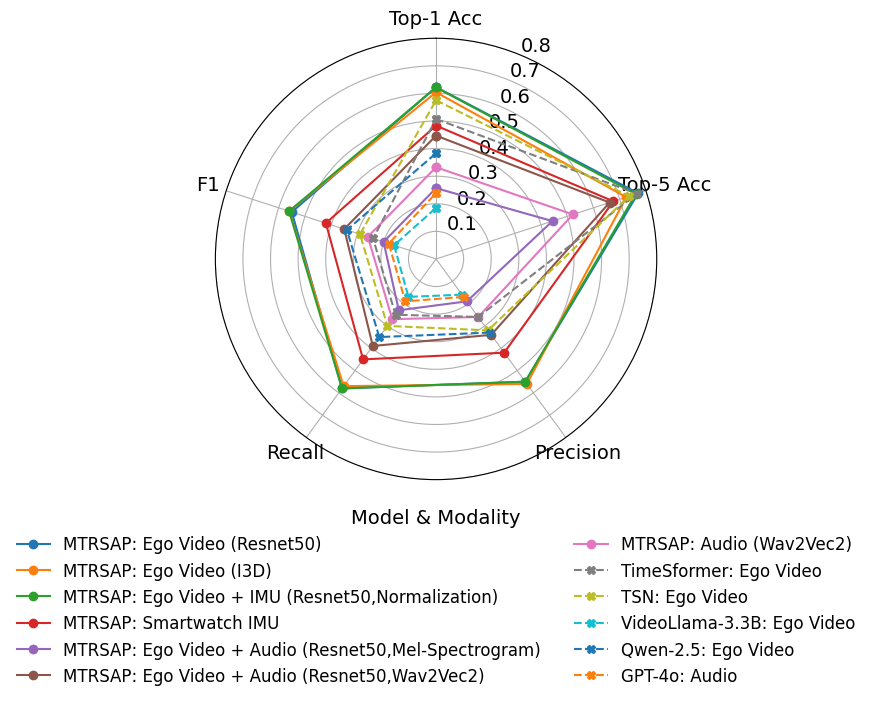

In [5]:
import numpy as np

df = pd.read_csv("./final_results_classification.csv")

# Normalize accuracy if it's in percentage
if df["accuracy"].max() > 1.0:
    df["accuracy"] /= 100.0

if df["top_5_accuracy"].max() > 1.0:
    df["top_5_accuracy"] /= 100.0

# Metrics and labels
metrics = [ "accuracy", "top_5_accuracy","average_precision", "average_recall", "average_f1",]
metric_labels = [ "Top-1 Acc",  "Top-5 Acc", "Precision", "Recall", "F1",]

# Combined label for legend
df["label"] = df["model"] + ": " + df["modality"]

# Radar plot angles
num_vars = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the loop


sns.reset_orig()
# Plot setup
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)


# Plot each model line
for i, row in df.iterrows():
    values = [row[m] for m in metrics]
    values += values[:1]  # close the loop

    model = row["model"]
    modality = row["modality"]

    # Style logic
    ls = '-' if model == 'MTRSAP' else '--'
    marker = 'o' if model == 'MTRSAP' else 'X'
    color = None
    if "Exo Video" in modality:
        ls = '-.'
        marker = 'D'
        color = 'gray'

        print("Skipping Exo Video (Resnet50) for now")
        continue  # skip this line for now

    ax.plot(
        angles,
        values,
        label=row["label"],
        linestyle=ls,
        marker=marker,
        color=color
    )

# Axis formatting
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), metric_labels, fontsize=12)
ax.set_ylim(0, 0.8)
ax.tick_params(labelsize=14)

# Legend below
ax.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.5),
    ncol=2,
    frameon=False,
    fontsize=12,
    title="Model & Modality",
    title_fontsize=14
)

plt.tight_layout(rect=[0, 0, 1.5, 1])  # Leave space at bottom for legend

plt.savefig(f'./plots/classification_results_radar.png', dpi=300, bbox_inches='tight')

plt.show()

# save the plot